## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.svm import SVC

workspace = '/content/drive/MyDrive/Multimedia Term Project/dataset/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read our data

In [ ]:
# our_df = pd.read_csv(workspace+'integrated.csv')
# our_df = pd.read_csv(workspace+'rescaled_integrated.csv')
# our_df = pd.read_csv(workspace+'rescaled_all_frames/all_frames_0.csv')
our_df = pd.read_csv("/content/drive/MyDrive/Multimedia Term Project/dataset/rescaled_all_frames/all_training_dataset.csv")



X = our_df[['EDA', 'BVP', 'HR', 'TEMP']]
Y = our_df[['event']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [ ]:
our_df['event'].value_counts()

5    124292
4       100
0        28
1        26
2         9
3         5
Name: event, dtype: int64

## Grid search for best hyperparameters

In [ ]:
# defining parameter range
param_grid = {'C': [1],              
              'kernel': ['rbf', 'poly', 'linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train[['EDA', 'BVP', 'HR']].values, Y_train['event'].values) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.529 total time=   0.1s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.532 total time=   0.1s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.532 total time=   0.1s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.532 total time=   0.1s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.532 total time=   0.1s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.529 total time=   0.1s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.532 total time=   0.1s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.532 total time=   0.1s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.532 total time=   0.1s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.532 total time=   0.1s
[CV 1/5] END ................C=1, kernel=linear;, score=0.529 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'rbf'}
SVC(C=1)


## Predictions

In [ ]:
grid = SVC(C=1, kernel='rbf')
grid.fit(X_train[['EDA', 'BVP', 'HR', 'TEMP']].values, Y_train['event'].values) 

SVC(C=1)

In [ ]:
grid_predictions = grid.predict(X_test[['EDA', 'BVP', 'HR', 'TEMP']].values)
 
# print classification report
print(classification_report(Y_test, grid_predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00       252
           5       1.00      1.00      1.00    350215

    accuracy                           1.00    350632
   macro avg       0.17      0.17      0.17    350632
weighted avg       1.00      1.00      1.00    350632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(Y_test, grid_predictions)
print(grid_predictions[1:100])
print(accuracy)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
0.9986140125341475


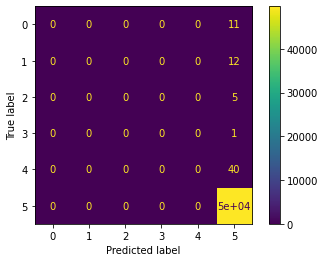

In [ ]:
cmx = confusion_matrix(Y_test, grid_predictions)
disp = ConfusionMatrixDisplay(cmx)
disp.plot()
plt.show()